<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/SVM/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

SVM - Support Vector Machine

SVM = Max-Margin Classifier that can handle both linear and non-linear classification.

SVM - support non-linear dataset

Kernel - Dimension higher

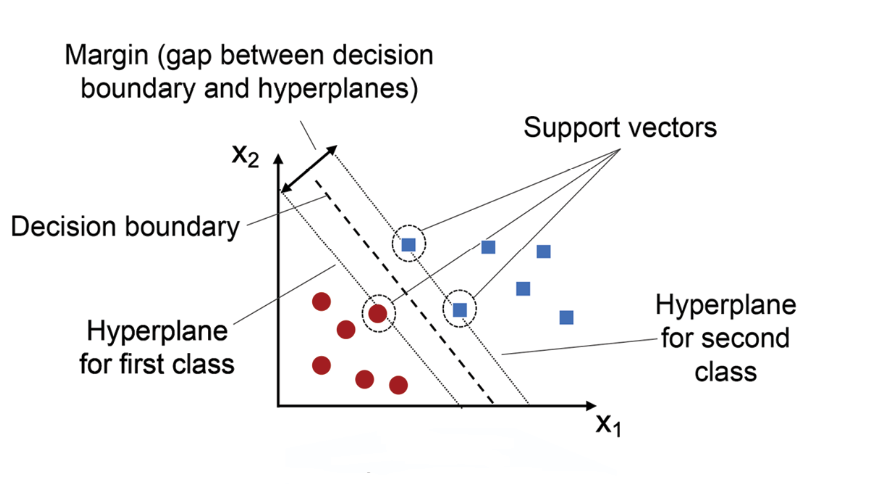

Support Vector Machine (**SVM**) is a **supervised machine learning algorithm** used for **classification** and **regression** tasks, but it is mostly applied in classification.


###  Core Idea

SVM tries to find the **best decision boundary (hyperplane)** that separates data points of different classes with the **maximum margin**.

* The margin is the distance between the hyperplane and the nearest data points from each class (called **support vectors**).
* A larger margin → better generalization on unseen data.



###  How it Works

1. **Linear case**: If data is linearly separable, SVM finds the straight line (in 2D), plane (in 3D), or hyperplane (in higher dimensions) that best separates classes.
2. **Non-linear case**: If data isn’t linearly separable, SVM uses the **kernel trick** to transform data into higher dimensions where it becomes separable.

Common **kernels**:

* **Linear kernel** – for linearly separable data.
* **Polynomial kernel** – captures polynomial relationships.
* **RBF (Radial Basis Function) kernel** – widely used for non-linear decision boundaries.
* **Sigmoid kernel** – similar to neural networks’ activation functions.



###  Advantages

* Works well in **high-dimensional spaces**.
* Effective when there is a **clear margin of separation**.
* Memory efficient (only uses support vectors).



###  Limitations

* Not very efficient with **large datasets** (computationally heavy).
* Performance depends on **choice of kernel and hyperparameters**.
* Less effective if classes overlap heavily.


###  Example

Imagine separating red circles and blue squares on a 2D graph:

* Logistic Regression: tries to find a line that separates them.
* SVM: finds the **line with the maximum margin** between closest points (support vectors).



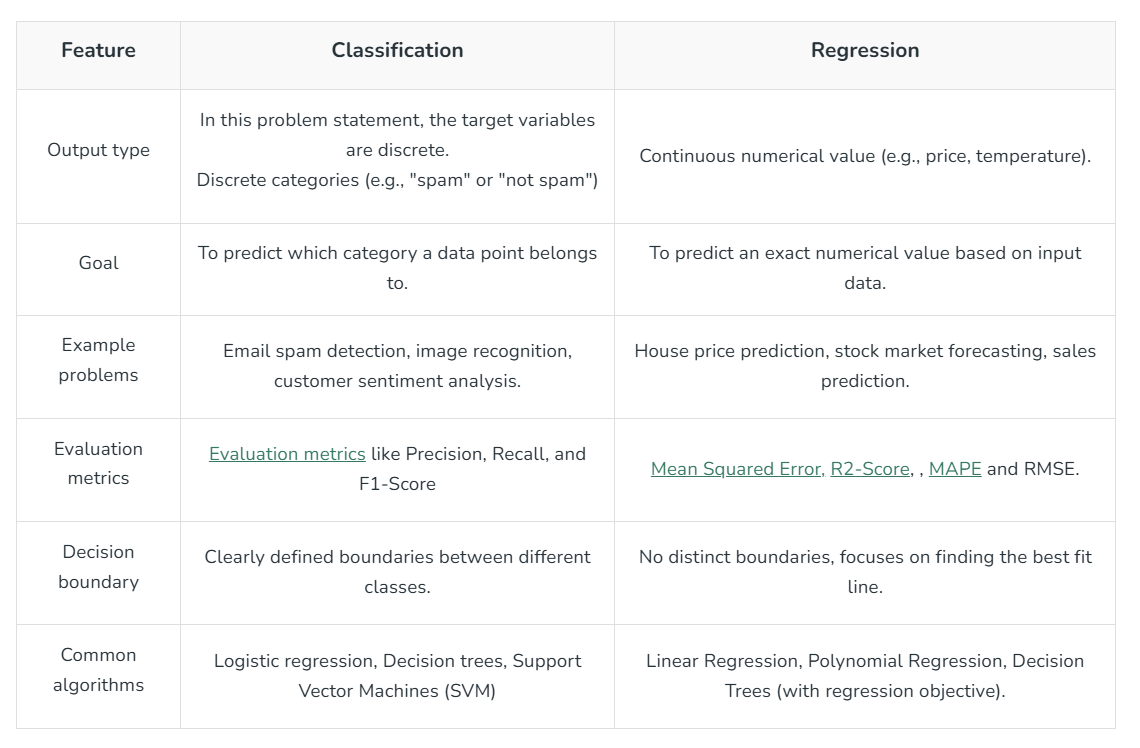



##  1. Based on Problem Type

### **(a) Classification SVM**

* **Linear SVM**

  * Works when data is linearly separable.
  * Finds the best straight line (or hyperplane) to classify data.

* **Non-Linear SVM**

  * Uses **kernel trick** to map data into higher dimensions.
  * Handles complex, non-linear boundaries.

Example: Image classification, spam filtering.



### **(b) Regression SVM (SVR – Support Vector Regression)**

* Instead of classifying, SVM predicts a continuous value.
* It tries to fit the best line within a margin (called **ε-insensitive tube**).
* Ignores errors inside the margin, only penalizes points outside it.

 Example: Stock price prediction, demand forecasting.



##  2. Based on Margin

* **Hard Margin SVM**

  * Assumes data is perfectly separable.
  * No misclassification allowed.
  * Works only if there’s a clear gap between classes.

* **Soft Margin SVM**

  * Allows some misclassification using **slack variables**.
  * More practical for noisy or overlapping data.
  * Controlled by parameter **C** (penalty).



##  3. Based on Kernel Function

* **Linear Kernel SVM** → straight-line boundaries.
* **Polynomial Kernel SVM** → polynomial decision boundaries.
* **RBF (Gaussian) Kernel SVM** → most common for non-linear problems.
* **Sigmoid Kernel SVM** → similar to neural networks.



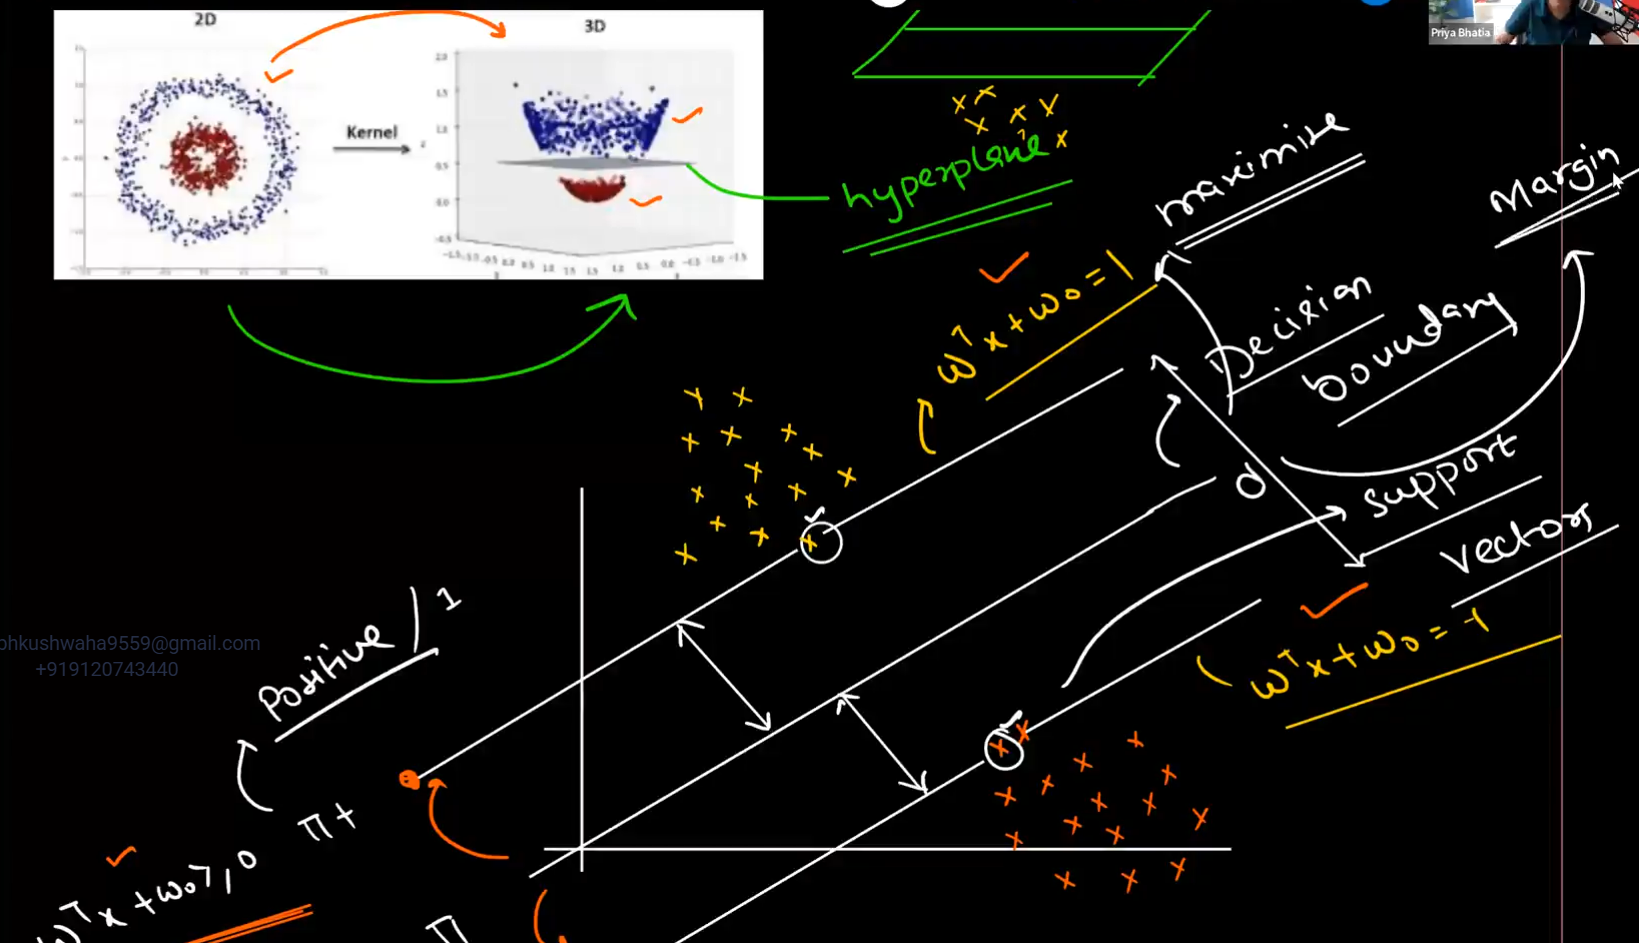

# SVM Implement

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
# load data
X, y = load_breast_cancer(return_X_y=True)


In [4]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.to_csv('breast_cancer.csv', index=False)
print("Breast cancer data saved as breast_cancer.csv")

Breast cancer data saved as breast_cancer.csv


In [6]:
df = pd.read_csv('/content/breast_cancer.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Calculate correlation matrix

### Subtask:
Calculate the correlation matrix of the DataFrame.


In [8]:
correlation_matrix = df.corr()

## Visualize correlation matrix

### Subtask:
Create a heatmap using the correlation matrix to visualize the relationships between the columns.


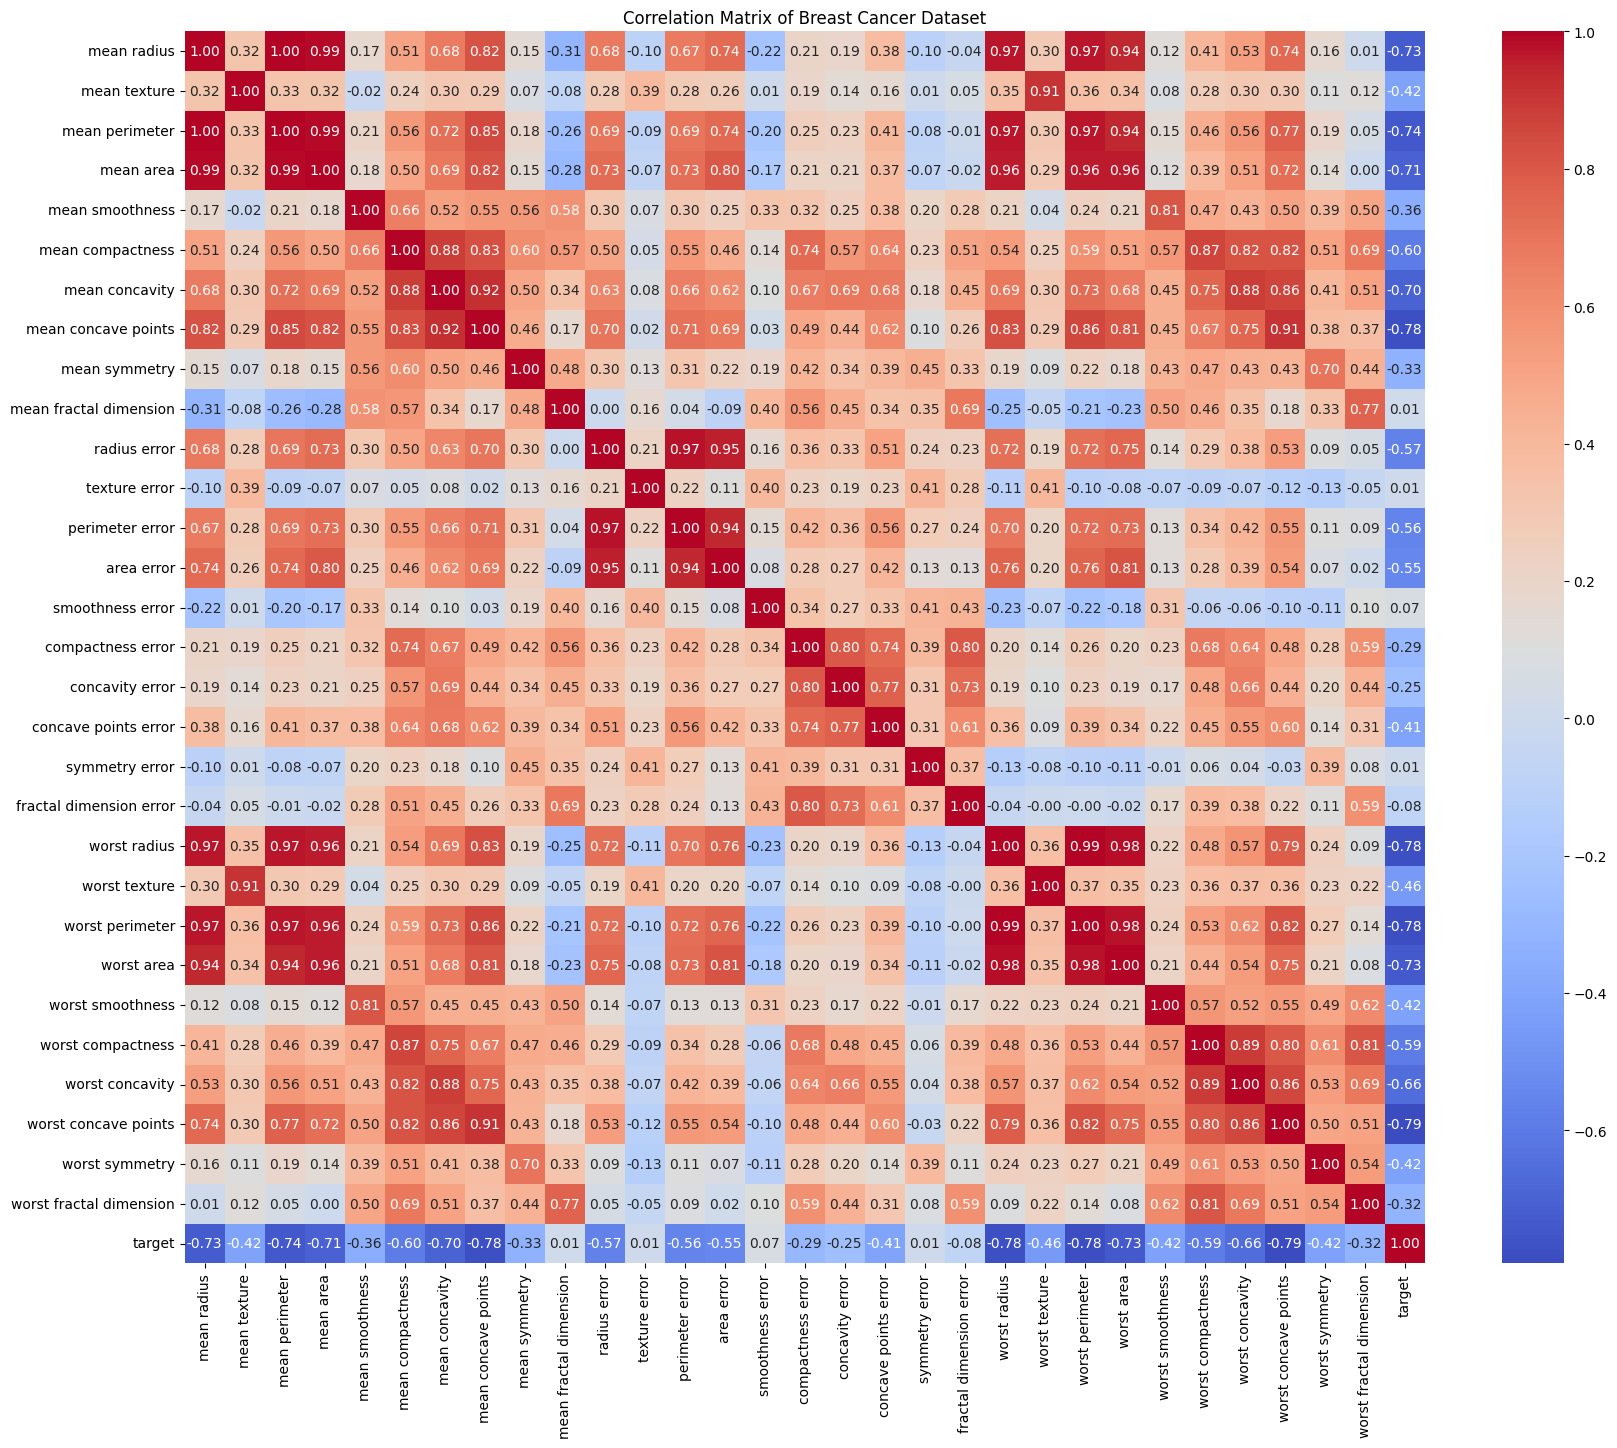

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Breast Cancer Dataset')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)

In [11]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.9790209790209791

Plot decision boundary

In [14]:
X_vis = X[:, :2]
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_vis, y)

SVC(kernel='linear')

In [15]:
X_vis

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

Plot in 2D

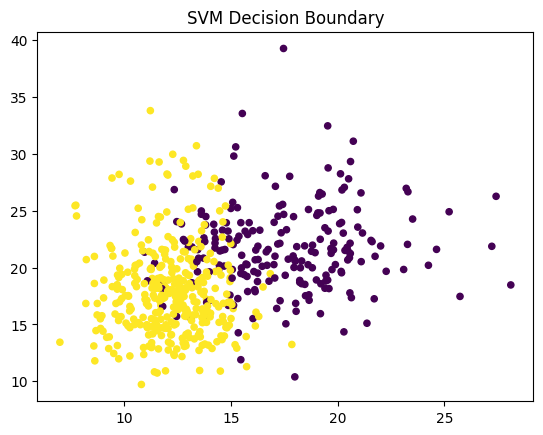

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, s=20)
plt.title('SVM Decision Boundary')
# plt.xlabel()
# plt.ylabel()
plt.show()